# xarray interpolation

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
da = xr.DataArray(
    np.sin(0.3 * np.arange(12).reshape(4, 3)),
    coords = [("time", np.arange(4)), ("space", [0.1, 0.2, 0.3])],
    name = 'foo'
)

print(da, end="\n\n")
print(da.interp(time=2.5))

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[ 0.        ,  0.29552021,  0.56464247],
       [ 0.78332691,  0.93203909,  0.99749499],
       [ 0.97384763,  0.86320937,  0.67546318],
       [ 0.42737988,  0.14112001, -0.15774569]])
Coordinates:
  * time     (time) int64 0 1 2 3
  * space    (space) float64 0.1 0.2 0.3

<xarray.DataArray 'foo' (space: 3)>
array([0.70061376, 0.50216469, 0.25885874])
Coordinates:
  * space    (space) float64 0.1 0.2 0.3
    time     float64 2.5


In [3]:
other = xr.DataArray(
    np.sin(0.4 * np.arange(9).reshape(3, 3)),
    [("time", [0.9, 1.9, 2.9]), ("space", [0.15, 0.25, 0.35])],
)

print(da, end="\n\n")
print(other)

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[ 0.        ,  0.29552021,  0.56464247],
       [ 0.78332691,  0.93203909,  0.99749499],
       [ 0.97384763,  0.86320937,  0.67546318],
       [ 0.42737988,  0.14112001, -0.15774569]])
Coordinates:
  * time     (time) int64 0 1 2 3
  * space    (space) float64 0.1 0.2 0.3

<xarray.DataArray (time: 3, space: 3)>
array([[ 0.        ,  0.38941834,  0.71735609],
       [ 0.93203909,  0.9995736 ,  0.90929743],
       [ 0.67546318,  0.33498815, -0.05837414]])
Coordinates:
  * time     (time) float64 0.9 1.9 2.9
  * space    (space) float64 0.15 0.25 0.35


In [4]:
interpolated = da.interp_like(other)

print(interpolated, end="\n\n")

<xarray.DataArray 'foo' (time: 3, space: 3)>
array([[0.78669071, 0.91129847,        nan],
       [0.91244395, 0.78887935,        nan],
       [0.3476778 , 0.06945207,        nan]])
Coordinates:
  * time     (time) float64 0.9 1.9 2.9
  * space    (space) float64 0.15 0.25 0.35



## advanced indexing

In [5]:
da = xr.DataArray(
    np.sin(0.3 * np.arange(20).reshape(5, 4)),
    [("x", np.arange(5)), ("y", [0.1, 0.2, 0.3, 0.4])],
)
x = xr.DataArray([0, 2, 4], dims="z")
y = xr.DataArray([0.1, 0.2, 0.3], dims="z")

print(da.sel(x=x, y=y))

<xarray.DataArray (z: 3)>
array([ 0.        ,  0.42737988, -0.77276449])
Coordinates:
    x        (z) int64 0 2 4
    y        (z) float64 0.1 0.2 0.3
Dimensions without coordinates: z


## advanced interpolation

In [6]:
x = xr.DataArray([0.5, 1.5, 2.5], dims="z")
y = xr.DataArray([0.15, 0.25, 0.35], dims="z")

print(da.interp(x=x, y=y))

<xarray.DataArray (z: 3)>
array([ 0.55626357,  0.63496063, -0.46643289])
Coordinates:
    x        (z) float64 0.5 1.5 2.5
    y        (z) float64 0.15 0.25 0.35
Dimensions without coordinates: z


# DESHIMA array interpolation

In [45]:
import pathlib
import yaml

import decode as dc
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.style.use("seaborn-muted")

In [69]:
dfits_file = pathlib.Path("../data/dfits_20171116105700.fits")
yaml_file = pathlib.Path("../yaml/pointing_params.yaml")
with open(yaml_file) as file:
    params = yaml.load(file, Loader=yaml.SafeLoader)
ch = params["loaddfits"]["ch"]

array = dc.io.loaddfits(dfits_file, **params["loaddfits"])
scanarray = array[array.scantype=="SCAN"]

Endtime of readout is adjusted to that of ANTENNA HDU.


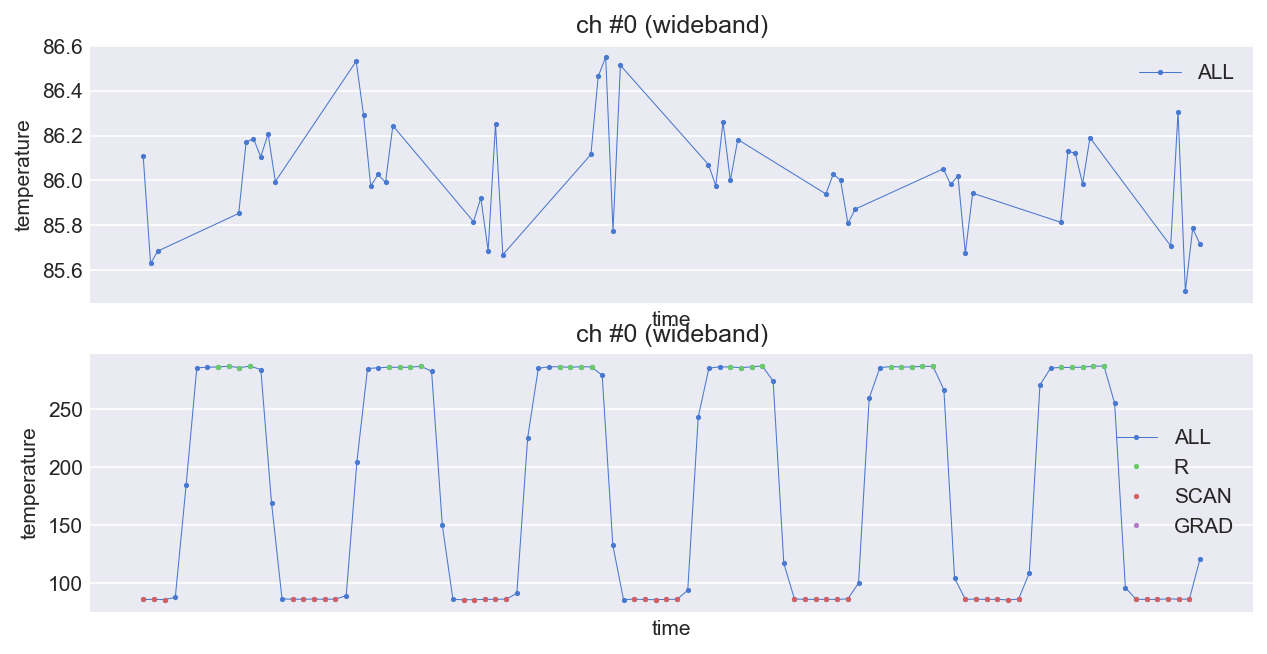

In [81]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), dpi=150)

plot_params0 = {"marker": ".", "markersize": 3.0, "linewidth": 0.5}
plot_params1 = {"marker": ".", "markersize": 3.0, "linestyle": "None"}

subarray = array[2000:2100, ]

dc.plot.plot_timestream(scanarray[1000:1050, ], ch, ax=ax[0], **plot_params0)

dc.plot.plot_timestream(subarray, ch, ax=ax[1], **plot_params0)
dc.plot.plot_timestream(subarray, ch, scantypes=["R"], ax=ax[1], **plot_params1)
dc.plot.plot_timestream(subarray, ch, scantypes=["SCAN"], ax=ax[1], **plot_params1)
dc.plot.plot_timestream(subarray, ch, scantypes=["GRAD"], ax=ax[1], **plot_params1)

In [67]:
array.coords["t"] = array.time
del array.coords["time"]

t_interp = pd.date_range("2017-11-16T10:59:49.398348000", "2017-11-16T11:08:17.496498000", periods=len(array.t))
array_interp = array.interp(t=t_interp)

array_interp.coords["time"] = array_interp.t
del array_interp.coords["t"]